In [13]:
import import_ipynb
import model
import cv2

casecade_file = cv2.CascadeClassifier(r"C:\Users\Sub\Anaconda3\envs\sub\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml")

def extract_face(frame, size=0.5) :
    
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = casecade_file.detectMultiScale(img, 1.3, 5)
    
    if faces is() :
        return frame, []
    
    for (x,y,w,h) in faces :
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 100), 1)
        
        roi = frame[y:y+h, x:x+w]
        
        roi = cv2.resize(roi, dsize=(224,224), interpolation=cv2.INTER_CUBIC)
        roi = roi.astype('float')/255
        roi = roi.reshape((1,224,224,3))
        
        #img = frame 위에 사각형이 그려진 사진
        #roi = 관심영역
    return frame, roi



In [6]:
smile_model = model.set_model('smile')
sad_model = model.set_model('sad')
angry_model = model.set_model('angry')
normal_model = model.set_model('normal')

Finish setting the smile_model
Finish setting the sad_model
Finish setting the angry_model
Finish setting the normal_model


heightest_index : 3.000
heightest_score : 0.994
99.3962% normal


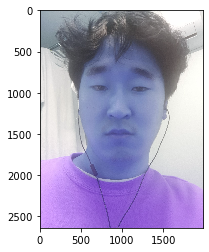

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/me2.jpg')

img, face = extract_face(img)
score = []
smile = smile_model.predict(face)
score.append(smile)
            
sad = sad_model.predict(face)
score.append(sad)
            
angry = angry_model.predict(face)
score.append(angry)
            
normal = normal_model.predict(face)
score.append(normal)

heightest_index = score.index(max(score))
heightest_score = max(score)

if heightest_index == 0 :
    confidence = format(100 * smile[0][0], '.4f')
    display_string = str(confidence) + '% smile'

elif heightest_index == 1 :
    confidence = format(100 * sad[0][0], '.4f')
    display_string = str(confidence) + '% sad'

elif heightest_index == 2 :
    confidence = format(100 * (1- angry[0][0]), '.4f')
    display_string = str(confidence) + '% angry'

elif heightest_index == 3 :
    confidence = format(100 * normal[0][0], '.4f')
    display_string = str(confidence) + '% normal'
    
print('heightest_index : %0.3f'%heightest_index)
print('heightest_score : %0.3f'%heightest_score)
print(display_string)

plt.imshow(img)
plt.show()

99.9451
99.9451% smile


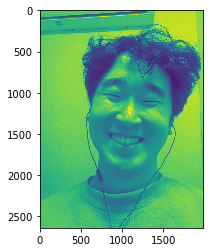

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('img/me.jpg')

img, face = extract_face(img)
score = []
smile = smile_model.predict(face)
score.append(smile)
            
sad = sad_model.predict(face)
score.append(sad)
            
angry = angry_model.predict(face)
score.append(angry)
            
normal = normal_model.predict(face)
score.append(normal)

heightest_index = score.index(max(score))
heightest_score = max(score)

if heightest_index == 0 :
    confidence = format(100 * smile[0][0], '.4f')
    display_string = str(confidence) + '% smile'

elif heightest_index == 1 :
    confidence = format(100 * sad[0][0], '.4f')
    display_string = str(confidence) + '% sad'

elif heightest_index == 2 :
    confidence = format(100 * (1- angry[0][0]), '.4f')
    display_string = str(confidence) + '% angry'

elif heightest_index == 3 :
    confidence = format(100 * normal[0][0], '.4f')
    display_string = str(confidence) + '% normal'
    
print(confidence)
print(display_string)

plt.imshow(img)
plt.show()

In [22]:
cap = cv2.VideoCapture(0)

if cap.isOpened():
    while True :
        ret, frame = cap.read()
        
        img, face = extract_face(frame)
        score = []
        try :
            
            smile = smile_model.predict(face)
            score.append(smile[0])
            print(smile[0])
            sad = sad_model.predict(face)
            score.append(sad[0])
            print(sad[0])
            angry = angry_model.predict(face)
            score.append(angry[0])
            print(angry[0])
            normal = normal_model.predict(face)
            score.append(normal[0])
            print(normal[0])
            print()
            
            heightest_index = socre.index(max(score))
            heightest_score = max(score)
            print(heightest_index)
            print(heightest_score)
            print()
            print('\n\nabcdef\n\n')
            if heightest_index == 0 :
                confidence = format(100 * smile[0][0], '.4f')
                display_string = str(confidence) + '% smile'
                
            elif heightest_index == 1 :
                confidence = format(100 * sad[0][0], '.4f')
                display_string = str(confidence) + '% sad'
                
            elif heightest_index == 2 :
                confidence = format(100 * (1- angry[0][0]), '.4f')
                display_string = str(confidence) + '% angry'
                
            elif heightest_index == 3 :
                confidence = format(100 * normal[0][0], '.4f')
                display_string = str(confidence) + '% normal'
            
            print(confidence)
            print(display_string)
            cv2.putText(img, display_string, (100,120), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 100, 250),1)
            
            cv2.imshow('face',img)
            
        except :
            cv2.putText(img, 'No Face in Camera', (100,120), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 100, 250),1)
            cv2.imshow('face', img)
            
        if cv2.waitKey(1) == 13:
            break
            
        
cap.release()
cv2.destroyAllWindows()
        
    

[0.00114523]
[0.96202356]
[4.9128015e-05]
[0.9785162]

[0.00016117]
[0.9733138]
[1.52070725e-05]
[0.9959716]

[0.12581524]
[0.96377355]
[7.0383554e-05]
[0.9960296]

[0.05047091]
[0.9700918]
[1.9308807e-05]
[0.99585634]

[0.04137032]
[0.96529484]
[3.352795e-06]
[0.995719]

[0.00316241]
[0.97148806]
[1.3157538e-06]
[0.99574137]

[0.01439361]
[0.9718294]
[2.4156645e-06]
[0.99595934]

[0.00172392]
[0.97643435]
[8.827655e-06]
[0.9868879]

[0.00691961]
[0.9670725]
[2.455644e-06]
[0.99361527]

[0.04765754]
[0.97706944]
[7.8383925e-07]
[0.9944482]

[0.00209293]
[0.9679263]
[1.2640824e-05]
[0.99491656]

[0.00555218]
[0.98105407]
[5.9353636e-07]
[0.9965321]

[0.06760301]
[0.96639174]
[4.3786567e-06]
[0.9897194]

[0.01011349]
[0.9611911]
[2.7034757e-06]
[0.9920987]

[0.02185019]
[0.9594116]
[1.3594778e-06]
[0.99199814]

[0.08256483]
[0.97547877]
[3.6170882e-06]
[0.99530774]

[0.00701862]
[0.9682178]
[2.293759e-05]
[0.9863853]

[0.03644584]
[0.9647829]
[3.3557603e-06]
[0.9932336]

[0.05049948]
[0.